<a href="https://colab.research.google.com/github/yamatetsu105931/AutoML_Exercise/blob/main/AutoML_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCaretを使用してKaggleの問題に挑戦

## PyCaretとは
「PyCaret」とは、様々な種類の機械学習を数行で実現してくれるライブラリであり、AutoMLツールの一つです。

AutoMLツール特有のわかりやすいGUIとかはほぼないのですが、**無料**で使えるためデモ用に採用しました。

## Kaggleとは
Kaggle は約 100 万人以上の方が利用している世界最大のデータサイエンスコンペティションプラットフォームです。2010 年にサービスを開始し、2017 年には Google が Kaggle 社を買収したためGoogle 傘下の企業となりました。

## 挑戦した課題について
### 題名

**Titanic : Machine Learning from Disaster**（タイタニック号：災害からの機械学習）

### URL
https://www.kaggle.com/c/titanic

### 内容

乗客の情報から乗客の生死を予想するお題です。

Kaggleの中でも特に有名な課題の１つであり、機械学習初心者がよく挑戦する課題です。
日本の記事としてもいくつも紹介されているため今回はこちらの課題をデモ用に採用しました。

## Pycaretのインストール
AutoMLをサポートするライブラリ、PyCaretのバージョンを指定してインストールします。

In [1]:
!pip install pycaret==2.3.6

     |████████████████████████████████| 301 kB 4.3 MB/s 
     |████████████████████████████████| 1.7 MB 45.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 48.8 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 167 kB 38.4 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 1.3 MB 39.5 MB/s 
     |████████████████████████████████| 114 kB 49.6 MB/s 
     |████████████████████████████████| 6.8 MB 37.0 MB/s 
     |████████████████████████████████| 2.0 MB 40.8 MB/s 
     |████████████████████████████████| 15.6 MB 37.5 MB/s 
     |████████████████████████████████| 636 kB 47.8 MB/s 
     |████████████████████████████████| 303 kB 54.2 MB/s 
     |████████████████████████████████| 675 kB 56.4 MB/s 
     |█████████████████

## Google Colaboratoryの設定
Google Colaboratory環境でPyCaretのインタラクティブな要素を表示するためには、以下のコードを実行する必要があります。

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## データセットの読み込み

*   train.csv：学習用のデータ
*   test.csv：検証用のデータ
*   gender_submission.csv：提出するデータセットのサンプル

学習用のデータには乗客の生存データが入っていますが、検証用のデータには入っていません。学習用データでモデルを作り、検証用データの乗客の生存を予測しなさいというお題です。

データセットは事前にgithubにアップロードしてあるのでそちらから読み込みます。
https://github.com/yamatetsu105931/AutoML_Exercise/tree/main/Titanic_MachineLearningfromDisaster_Dataset

In [3]:
import pandas as pd

trainDataUrl = 'https://raw.githubusercontent.com/yamatetsu105931/AutoML_Exercise/main/Titanic_MachineLearningfromDisaster_Dataset/train.csv'
testDataUrl = 'https://raw.githubusercontent.com/yamatetsu105931/AutoML_Exercise/main/Titanic_MachineLearningfromDisaster_Dataset/test.csv'
sampleSubmissionDataUrl = 'https://raw.githubusercontent.com/yamatetsu105931/AutoML_Exercise/main/Titanic_MachineLearningfromDisaster_Dataset/gender_submission.csv'

trainData = pd.read_csv(trainDataUrl)
testData = pd.read_csv(testDataUrl)
sampleSubmissionData = pd.read_csv(sampleSubmissionDataUrl)


## データセットの確認
学習用のデータの中身を確認します。

*   PassengerId – 乗客識別ユニークID
*   Survived – 生存フラグ（0=死亡、1=生存）
*   Pclass – チケットクラス
*   Name – 乗客の名前
*   Sex – 性別（male=男性、female＝女性）
*   Age – 年齢
*   SibSp – タイタニックに同乗している兄弟/配偶者の数
*   parch – タイタニックに同乗している親/子供の数
*   ticket – チケット番号
*   fare – 料金
*   cabin – 客室番号
*   Embarked – 出港地（タイタニックへ乗った港）

詳細：https://www.codexa.net/kaggle-titanic-beginner/

In [11]:
print(trainData.shape)
trainData.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
print(testData.shape)
testData.head(10)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


##環境の設定
PyCaretの環境を設定します。

setup関数はPyCaretの環境を初期化しますが、PyCaretの他の関数を実行する前に呼び出す必要があります。

以下のコードを実行すると、setup関数が実行されてすべての特徴のデータ型が自動的に推定されます。

この際に必ずしも正しく推論されるとは限らないことに注意してください。
データの型に問題が無ければ、空白を入力することで設定を完了することができます。

※実行後に**[Enter]**を押してください。押さないと止まりません。

In [4]:
from pycaret.classification import *
clf = setup(data = trainData,target = 'Survived',session_id = 123)

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


## モデルの比較
様々なモデルを比較して性能を評価します。

compare_models関数はライブラリ内のすべてのモデルを使って訓練を行いスコアを評価します。

### モデル
*   Gradient Boosting Classifier：勾配ブースティング
*   Logistic Regression：ロジスティック回帰
*   Decision Tree Classifier：決定木
*   Random Forest Classifier：ランダムフォレスト
*   K Neighbors Classifier：k近傍法

### 評価指標
*   Accuracy：予測結果が実際に当たっていた割合を示す。（1に近いほど良し）
*   Recall：実際に陽性であるもののうち、正しく陽性であると予測できた割合を表します。
*   Prec.：陽性であると予測したもののうち、実際に陽性だった割合を表します。
*   F1：PrecisionとRecallの両方を加味した評価を表します。

評価指標の詳細：https://qiita.com/shuhigashi/items/cb6816a1da1d347bbdc2


In [5]:
best = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8154,0.8575,0.6923,0.8140,0.7470,0.6030,0.6091,0.382
ridge,Ridge Classifier,0.8139,0.0000,0.7462,0.7727,0.7587,0.6072,0.6080,0.044
lr,Logistic Regression,0.8138,0.8584,0.7538,0.7701,0.7608,0.6084,0.6096,0.640
dt,Decision Tree Classifier,0.8090,0.7976,0.7457,0.7660,0.7537,0.5979,0.6000,0.052
ada,Ada Boost Classifier,0.8042,0.8458,0.7130,0.7762,0.7407,0.5838,0.5876,0.210
rf,Random Forest Classifier,0.7994,0.8653,0.6763,0.7829,0.7241,0.5681,0.5731,0.594
et,Extra Trees Classifier,0.7978,0.8589,0.6890,0.7697,0.7252,0.5666,0.5703,0.590
lightgbm,Light Gradient Boosting Machine,0.7881,0.8487,0.6925,0.7540,0.7171,0.5489,0.5539,0.127
knn,K Neighbors Classifier,0.6903,0.7274,0.5865,0.6123,0.5971,0.3463,0.3480,0.151
svm,SVM - Linear Kernel,0.6371,0.0000,0.2770,0.5406,0.2670,0.1460,0.1918,0.048


### Gradient Boosting Classifier（GBC）
Accuracyの高いGBCをそのままモデルとして選ぶのではなく、ハイパーパラメータをチューニングしてもっと精度の良いモデルがないか確認します。

ひとまずAccuracyが一番高い**Gradient Boosting Classifier**のハイパーパラメータをいじってみます。

create_modelでは交差検証（10回）にて検証がおこなわれていきます。
一番重要なのはMean（平均値）とSD（標準偏差）です。

交差検証：https://aiacademy.jp/media/?p=263

In [6]:
gbcModel = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8553,0.7600,0.9048,0.8261,0.7273,0.7341
1,0.8095,0.8763,0.7200,0.7826,0.7500,0.5966,0.5979
2,0.7460,0.8258,0.6800,0.6800,0.6800,0.4695,0.4695
3,0.8065,0.7978,0.6800,0.8095,0.7391,0.5871,0.5928
4,0.7419,0.7697,0.6250,0.6818,0.6522,0.4477,0.4487
5,0.8387,0.8876,0.6667,0.8889,0.7619,0.6437,0.6589
6,0.8065,0.8871,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.9032,0.9430,0.7917,0.9500,0.8636,0.7896,0.7975
8,0.8226,0.8777,0.7083,0.8095,0.7556,0.6173,0.6207
9,0.8065,0.8547,0.6250,0.8333,0.7143,0.5724,0.5860


tune_model()はハイパーパラメータの最適化を行います。

PyCaretではランダムグリッドサーチによる最適化が行われます。

グリッドサーチ：https://aizine.ai/glossary-gridsearch/

In [10]:
tuned_gbcModel = tune_model(gbcModel,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8721,0.6800,0.8947,0.7727,0.6542,0.6688
1,0.7619,0.8511,0.6400,0.7273,0.6809,0.4922,0.4948
2,0.7619,0.8321,0.6400,0.7273,0.6809,0.4922,0.4948
3,0.7581,0.7897,0.7200,0.6923,0.7059,0.5005,0.5008
4,0.7742,0.7566,0.6250,0.7500,0.6818,0.5090,0.5141
5,0.8065,0.8602,0.7083,0.7727,0.7391,0.5857,0.5871
6,0.7903,0.8838,0.6250,0.7895,0.6977,0.5405,0.5491
7,0.8710,0.9232,0.7917,0.8636,0.8261,0.7238,0.7256
8,0.8548,0.8618,0.8333,0.8000,0.8163,0.6964,0.6968
9,0.8065,0.8476,0.7917,0.7308,0.7600,0.5983,0.5996


チューニング前のAccuracy = 0.8154<br>
チューニング後のAccuracy = 0.8026

なぜかチューニング後のほうがAccuracyが下がるという謎の現象が起こりました。<br>
原因は不明です。

### Random Forest（RF）
次はrfのハイパーパラメータをいじってみます。

In [11]:
rfModel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.9032,0.7600,0.8261,0.7917,0.6638,0.6653
1,0.8095,0.8705,0.7200,0.7826,0.7500,0.5966,0.5979
2,0.7302,0.8247,0.6400,0.6667,0.6531,0.4324,0.4327
3,0.7258,0.7924,0.5600,0.7000,0.6222,0.4112,0.4175
4,0.7581,0.7796,0.5833,0.7368,0.6512,0.4698,0.4773
5,0.8226,0.8925,0.6667,0.8421,0.7442,0.6112,0.6209
6,0.7903,0.9079,0.5833,0.8235,0.6829,0.5330,0.5507
7,0.8710,0.9457,0.7917,0.8636,0.8261,0.7238,0.7256
8,0.8548,0.8816,0.7917,0.8261,0.8085,0.6917,0.6921
9,0.7903,0.8553,0.6667,0.7619,0.7111,0.5477,0.5507


In [14]:
tuned_rfModel =  tune_model(rfModel,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8911,0.8000,0.8696,0.8333,0.7311,0.7327
1,0.7778,0.8621,0.7600,0.7037,0.7308,0.5421,0.5432
2,0.6984,0.7916,0.8000,0.5882,0.6780,0.4065,0.4236
3,0.7903,0.7995,0.6800,0.7727,0.7234,0.5557,0.5586
4,0.7742,0.7538,0.7083,0.7083,0.7083,0.5241,0.5241
5,0.7742,0.8218,0.7500,0.6923,0.7200,0.5313,0.5325
6,0.8548,0.8026,0.7917,0.8261,0.8085,0.6917,0.6921
7,0.8710,0.8684,0.8333,0.8333,0.8333,0.7281,0.7281
8,0.8387,0.8607,0.8750,0.7500,0.8077,0.6702,0.6761
9,0.8226,0.8459,0.8333,0.7407,0.7843,0.6345,0.6377


チューニング前のAccuracy = 0.7994<br>
チューニング後のAccuracy = 0.8075

今度はAccuracyが上がりました。よかったよかった。

## モデルの可視化
evalute_model()を使ってモデルの可視化をしていきます。

In [17]:
evaluate_model(gbcModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 未知のデータを予測する
Accuracyだけを見たら**GBC（チューニング前）**が一番精度が良かったです。<br>
それを使って検証用データの生存フラグを予測します。

Pycaretのsetup()はデフォルトだとトレーニング用のデータと、検証用のデータに分割してしまいます。<br>
トレーニング用データ：検証用データ = 70：30

Kaggleでは初めから検証用のデータが分割された状態で来るので、下記のように変更しちゃいます。<br>
トレーニング用データ：検証用データ = 99：1

In [19]:
clf = setup(data = trainData,target = 'Survived',session_id = 456,train_size = 0.99)
gbcModel = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7865,0.8316,0.6471,0.7586,0.6984,0.5348,0.5389
1,0.8315,0.8936,0.7941,0.7714,0.7826,0.6450,0.6452
2,0.8523,0.8978,0.7273,0.8571,0.7869,0.6750,0.6803
3,0.8523,0.8716,0.7576,0.8333,0.7937,0.6790,0.6809
4,0.7841,0.8543,0.6765,0.7419,0.7077,0.5371,0.5385
5,0.7500,0.8058,0.5000,0.7727,0.6071,0.4359,0.4581
6,0.7841,0.8668,0.6765,0.7419,0.7077,0.5371,0.5385
7,0.8068,0.8799,0.5588,0.9048,0.6909,0.5615,0.5960
8,0.8409,0.8576,0.6765,0.8846,0.7667,0.6492,0.6627
9,0.8409,0.9090,0.7059,0.8571,0.7742,0.6532,0.6605


モデルを確定させます。

In [20]:
final_gbcModel = finalize_model(gbcModel)
print(final_gbcModel)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=456, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


検証用データの生存ラベルを予測します

In [23]:
unseen_predictions = predict_model(final_gbcModel, data = testData)
print(unseen_predictions.shape)
unseen_predictions.head(10)

(418, 13)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8931
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.5852
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8828
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.9029
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.5009
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0.9029
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,0.6414
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,0.8683
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,0.6552
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0.9029


In [26]:
print(testData.shape)
testData.head(10)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Kaggleに予測結果を提出
①提出用フォーマットを確認する

②結果をローカルにダウンロードする

③フォーマット通りに編集する（割愛）

④提出する（割愛）

In [25]:
sampleSubmissionData.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [31]:
unseen_predictions.to_csv('unseen_data_predicted_Label.csv')

from google.colab import files
files.download('unseen_data_predicted_Label.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 結果の確認
Scoreは0.78229、順位は14007人中**2749位**でした。

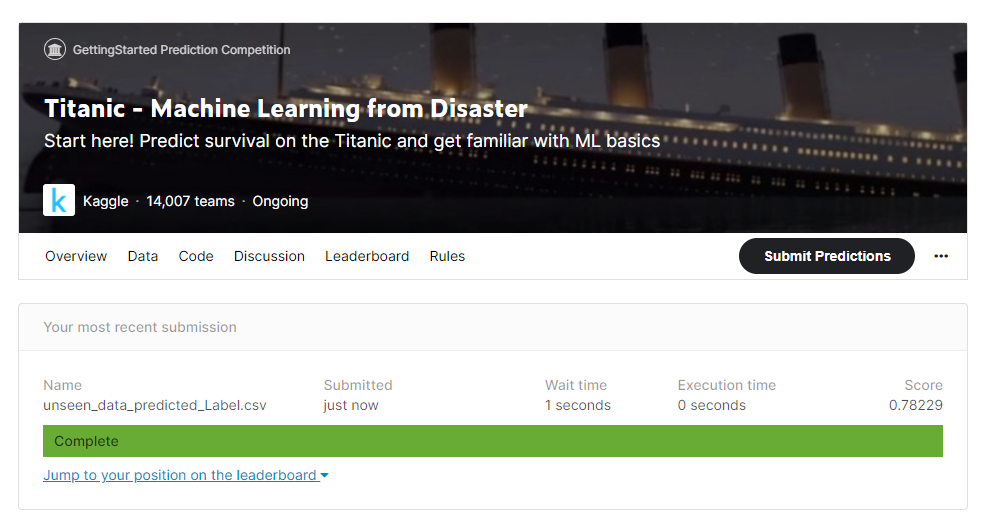

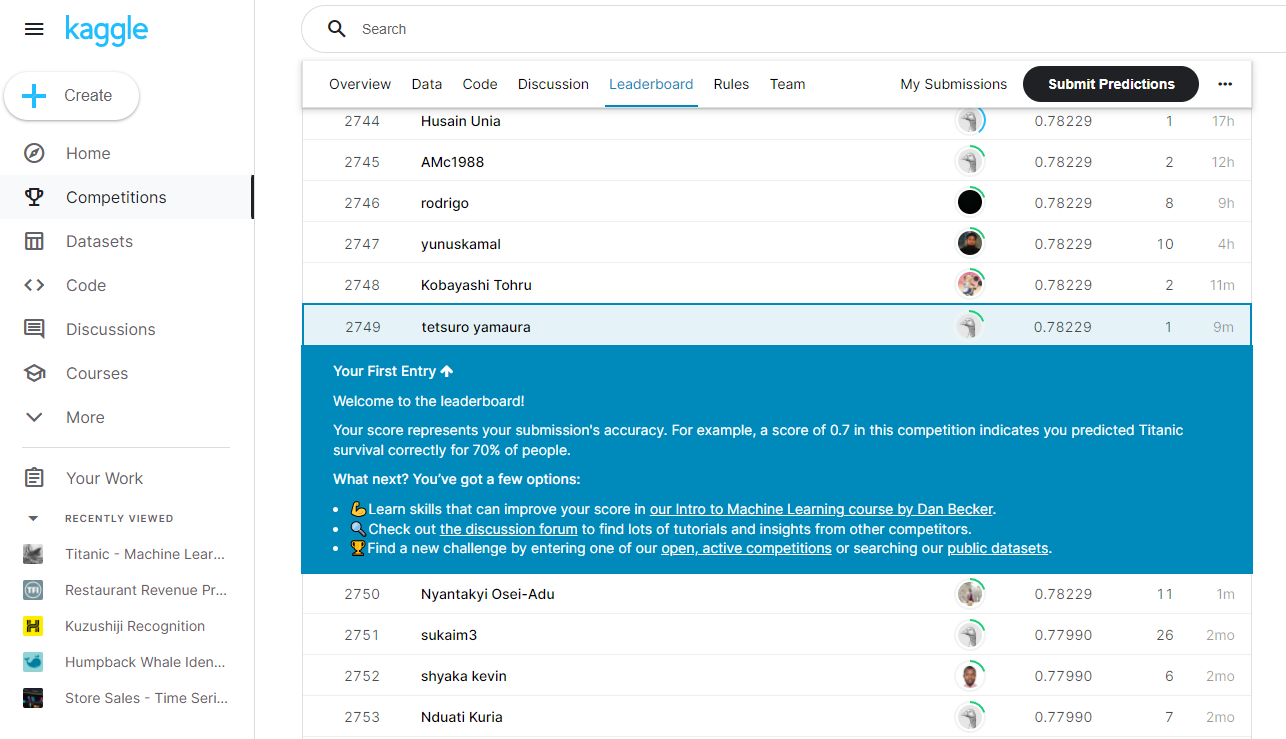

# 参考文献

*  PyCaretに興味を持った動画（結構面白いのでお勧めです）<br>
https://www.youtube.com/watch?v=2fzfxviOCT8&t=2503s

*  お題の確認で参考<br>
https://www.codexa.net/kaggle-titanic-beginner/

*  PyCaretのホームページ<br>
https://pycaret.gitbook.io/docs/

*  PyCaretのまとめ<br>
https://qiita.com/shuhigashi/items/cb6816a1da1d347bbdc2

*  Pycaretでタイタニック生存予想<br>
https://qiita.com/kotai2003/items/a377f45ddee9829ed2c5
